In [83]:
!pip install sympy
!pip install graphviz

In [84]:
import numpy as np 
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import *


/tmp/ipykernel_36295/65899123.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_needed_noise0['correct'] = results_needed_noise0['correct'].apply(lambda x: 100 * x)


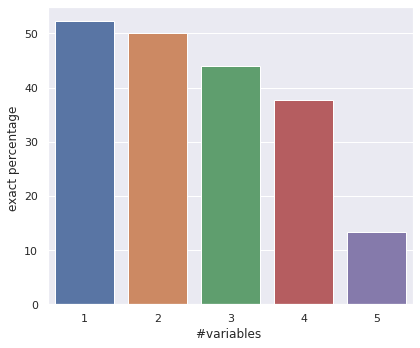

In [85]:
## include results 

results = pd.read_csv("random_results.xlsx")

results_needed_noise0 = results[["group", "size", "size_class", "vars", "true model",  "time", "correct ind", "correct"]]
results_needed_noise0['correct'] = results_needed_noise0['correct'].apply(lambda x: 100 * x)

### set up properties:
font = {'family' : 'normal',
       # 'weight' : 'bold',
        'size'   : 30}

mplt.rc('font', **font)
#mplt.rc('xtick', labelsize=40) 
#mplt.rc('ytick', labelsize=40) 
sns.set(rc={'figure.figsize':(6, 5)})
#mplt.rcParams.update(font)

sns.barplot(x='vars',y='correct', data=results_needed_noise0, ci=None)
#results_needed_noise0_gb_vars = results_needed_noise0.groupby(["vars"]).aggregate( {"correct": "mean"} )
#results_needed_noise0_gb_vars
plt.xlabel("#variables ")
plt.ylabel("exact percentage ")
plt.tight_layout()
plt.savefig("numvars_vs_exact_correct_no_noise.eps")
plt.show()

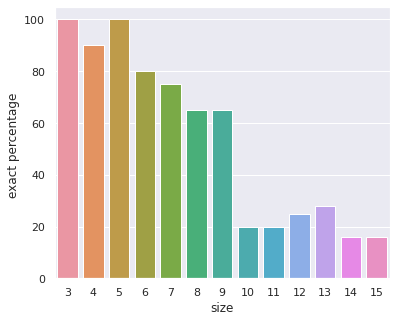

In [86]:
######################## exact percentages w.r.t. size of exact models ==> no noisy data

results_needed_noise0_reset = results_needed_noise0.reset_index()
#results_needed_noise0_reset['correct'] = results_needed_noise0_reset['correct'].apply(lambda x: 100*x)
sns.set(rc={'figure.figsize':(12.7,10.27)})
### set up properties:
font = {'family' : 'normal',
       # 'weight' : 'bold',
        'size'   : 30}

mplt.rc('font', **font)
mplt.rc('xtick', labelsize=70) 
mplt.rc('ytick', labelsize=70) 
sns.set(rc={'figure.figsize':(6, 5)})

sns.barplot(x='size',y='correct', data=results_needed_noise0_reset, ci=None)

results_needed_noise0_gb_size = results_needed_noise0.groupby(["size"]).aggregate( {"correct": "mean"} )
#results_needed_noise0['correct'] = results_needed_noise0['correct'].apply(lambda x: 100*x, axis = 0)
results_needed_noise0_gb_size

plt.xlabel("size")
plt.ylabel("exact percentage ")
plt.savefig("numsize_vs_exact_correct_no_noise.eps")  
plt.show()

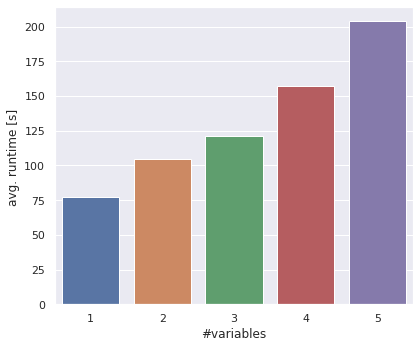

,time
vars,
1,77.578462
2,104.341667
3,121.476000
4,157.157778
5,204.066667


In [87]:
##################  exact percentages w.r.t. runtime
### set up properties:
font = {'family' : 'normal',
       # 'weight' : 'bold',
        'size'   : 30}

mplt.rc('font', **font)
mplt.rc('xtick', labelsize=70) 
mplt.rc('ytick', labelsize=70) 
sns.set(rc={'figure.figsize':(6, 5)})

sns.barplot(x='vars', y='time', data=results_needed_noise0, ci=None)
plt.tight_layout()
plt.xlabel("#variables")
plt.ylabel("avg. runtime [s] ")
plt.savefig("numsize_vs_time_no_noise.eps")  
plt.show()
# numerical results
results_needed_noise0_time  = results_needed_noise0.groupby(["vars"]).aggregate({"time" : "mean"})
results_needed_noise0_time

['group', 'size', 'size_class', 'vars', 'true model', 'time.2', 'correct.2']


/tmp/ipykernel_36295/3098640663.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_needed_noise_level[cols_expected[-1]] = results_needed_noise_level[cols_expected[-1]].apply(lambda x: 100*x)


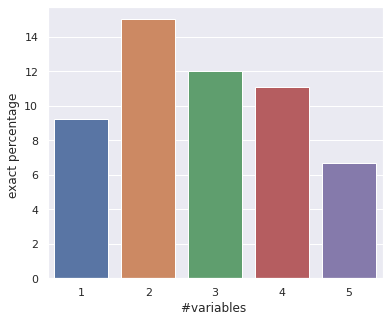

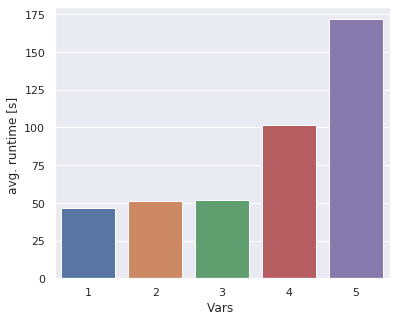

In [88]:
############ noisy data plots:
NOISE_LEVEL = 0.001
cols_expected = ["group", "size", "size_class", "vars", "true model" ]

#additional columns depending of noise level:
index = ""
if NOISE_LEVEL == 0.01:
    index = ".1"
else:
    index =".2"

cols_expected.append("time" + index)
cols_expected.append("correct" + index)
print(cols_expected)
#results.info()
results_needed_noise_level = results[cols_expected]
## transform to percentages 
results_needed_noise_level[cols_expected[-1]] = results_needed_noise_level[cols_expected[-1]].apply(lambda x: 100*x)
results_needed_noise_level

#### VARS vs. exact precission:
sns.set(rc={'figure.figsize':(6, 5)})
### set up properties:
font = {'family' : 'normal',
       # 'weight' : 'bold',
        'size'   : 30}

mplt.rc('font', **font)
mplt.rc('xtick', labelsize=70) 
mplt.rc('ytick', labelsize=70) 
sns.set(rc={'figure.figsize':(6, 5)})

sns.barplot(x = "vars", y = cols_expected[-1], data = results_needed_noise_level, ci=None )
###### customize the plot:
plt.xlabel("#variables ")
plt.ylabel("exact percentage ")
plt.savefig("numvars_vs_exact_correct_noise" + str(NOISE_LEVEL).replace( ".", "_" ) + ".eps")
plt.show()
# numerical results
results_needed_noise_level_avg = results_needed_noise_level.groupby("vars").aggregate({cols_expected[-1]:"mean"})
results_needed_noise_level_avg

#### VARS vs. AVG RUNTIME:
sns.set(rc={'figure.figsize':(12.7,10.27)})
### set up properties:
font = {'family' : 'normal',
       # 'weight' : 'bold',
        'size'   : 30}

mplt.rc('font', **font)
mplt.rc('xtick', labelsize=70) 
mplt.rc('ytick', labelsize=70) 
sns.set(rc={'figure.figsize':(6, 5)})

sns.barplot(x = "vars", y = cols_expected[-2], data = results_needed_noise_level, ci=None)
###### customize the plot:
plt.xlabel("Vars ")
plt.ylabel("avg. runtime [s] ")
plt.savefig("vars_vs_time_noise" + str(NOISE_LEVEL).replace( ".", "_" ) + ".eps")
plt.show()
# numerical results
#results_needed_noise_level[results_needed_noise_level["vars"] == 5]

# numerical results
results_needed_noise_levelSize_avg = results_needed_noise_level.groupby("size").aggregate({cols_expected[-1] : "mean"})
results_needed_noise_levelSize_avg_reset = results_needed_noise_levelSize_avg.reset_index()
#results_needed_noise_level[results_needed_noise_level["size"] == 7]
#results_needed_noise_levelSize_avg_reset.plot(kind="bar", x = "size", y="correct.2")

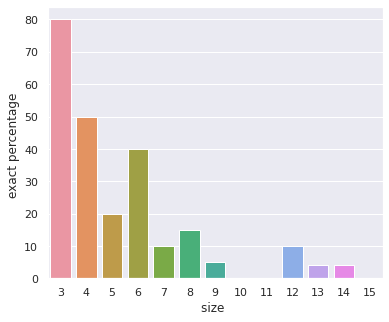

In [89]:
#### SIZE vs. exact precission 
### set up properties:
font = {'family' : 'normal',
       # 'weight' : 'bold',
        'size'   : 30}

mplt.rc('font', **font)
mplt.rc('xtick', labelsize=70) 
mplt.rc('ytick', labelsize=70) 
sns.set(rc={'figure.figsize':(6, 5)})

sns.barplot(x = "size", y = str(cols_expected[-1]), data = results_needed_noise_level, ci=None )
###### customize the plot:
plt.xlabel("size ")
plt.ylabel("exact percentage ")
plt.savefig("numsize_vs_exact_correct_noise" + str(NOISE_LEVEL).replace( ".", "_" ) + ".eps")
plt.show()

<AxesSubplot:xlabel='size', ylabel='correct.2'>

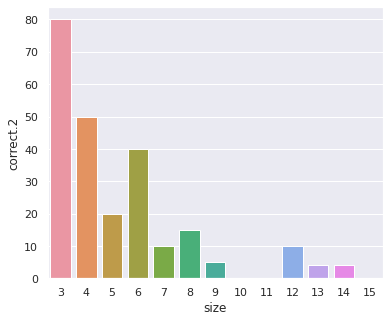

In [90]:
sns.barplot(x = "size", y = str(cols_expected[-1]), data = results_needed_noise_level, ci=None )



        group  size size_class  vars  \
122   v1_8-11    11       8-11     1   
126   v2_8-11    11       8-11     2   
137   v4_8-11    11       8-11     4   
140  v1_12-15    12      12-15     1   
143  v1_12-15    12      12-15     1   
150  v3_12-15    12      12-15     3   
155  v4_12-15    12      12-15     4   
156  v4_12-15    12      12-15     4   
158  v4_12-15    12      12-15     4   
159  v4_12-15    12      12-15     4   
165  v2_12-15    13      12-15     2   
168  v2_12-15    13      12-15     2   
172  v3_12-15    13      12-15     3   
175  v4_12-15    13      12-15     4   
178  v4_12-15    13      12-15     4   
179  v4_12-15    13      12-15     4   
181  v5_12-15    13      12-15     5   
182  v5_12-15    13      12-15     5   
187  v1_12-15    14      12-15     1   
201  v4_12-15    14      12-15     4   
204  v4_12-15    14      12-15     4   
205  v5_12-15    14      12-15     5   
209  v5_12-15    14      12-15     5   
215  v2_12-15    15      12-15     2   


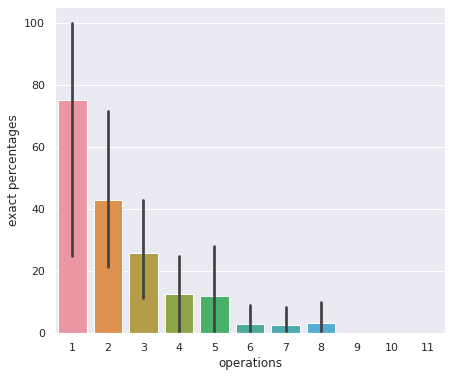

In [105]:
import seaborn as sns
#### number of OPERATORS invoked in the exact model
def eval_operators(formula):
    """
    plus = formula.count("+")
    minus = formula.count("-")
    division = formula.count("/")
    exponent = formula.count("**")
    
    multiply0 = formula.count(")*")
    multiply1 = formula.count("*(")
    multiply2 = formula.count("*x")
    multiply3 = formula.count("x1*")
    multiply4 = formula.count("x2*")
    multiply5 = formula.count("x3*")
    multiply6 = formula.count("x4*")
    multiply7 = formula.count("x0*")
    multiply8 = formula.count("*sin")
    multiply9 = formula.count("*cos")
    multiply10 = formula.count("*exp")
    multiply11 = formula.count("*log")
    multiply12 = formula.count("*sqrt")

    multiplydiff1 = formula.count("x1*x")
    multiplydiff2 = formula.count("x2*x")
    multiplydiff3 = formula.count("x3*x")
    multiplydiff4 = formula.count("x4*x")

    multiplyDiff = multiplydiff1 + multiplydiff2 + multiplydiff3 + multiplydiff4

    return -multiplyDiff + plus + minus + division + exponent + multiply0 + multiply1 + multiply2 + multiply3 + multiply4 + multiply5 + multiply6 + multiply7 + multiply8 + multiply9 + multiply10 + multiply11 + multiply12
    """
    x0, x1, x2, x3, x4 = symbols('x0 x1 x2 x3 x4')
    fs = sympify(formula)
    #sx = Source(dotprint(fs))
    return fs.count_ops(), len(fs.atoms())


# data ==> ratio vs. percentages of exacteness 
def ratio_plot_grouped(results_needed_noise0, noise_level = 0):
    
    results_needed_noise0['ratio'] = results_needed_noise0.apply( lambda x: round( int(x.split("-")[0] )  /  int( x.split("-")[1] ) , 2 ))
    if noise_level == 0:
        sns.barplot(data = results_needed_noise0, x="ratio", y="correct")
    else:
    
        ############## noise level included:
        sns.barplot(data = results_needed_noise_level, x="ratio", y = cols_expected[-1])
        
    plt.show()

####### operators / size ratio

def operators_vs_size(results_needed_noise, noise_level):
    
        results_needed_noiseA = results_needed_noise.copy(deep=True)
        
        results_needed_noiseA['operations'] = results_needed_noiseA['true model'].apply( lambda x:  eval_operators(x)[0] )
        #results_needed_noiseA['ratio'] = results_needed_noiseA.apply( lambda x: round( x.operators[0] / (x.operators[0] + x.operators[1]), 1), axis = 1 )
        #results_needed_noiseA['op>size'] = results_needed_noiseA.apply( lambda x: str(x.operators) + " " + str(x.size), axis = 1 )
        print(results_needed_noiseA[results_needed_noiseA['operations'] == 8])
        plt.figure(figsize=(7, 6))
        if noise_level == 0:
            sns.barplot(data = results_needed_noiseA, x="operations", y="correct")
        else:
            sns.barplot(data = results_needed_noiseA, x="operations", y = cols_expected[-1])
        
        #if noise_level > 0 :
        plt.ylabel("exact percentages")        

        plt.savefig("operations_" + str(noise_level) + ".eps")
        plt.show()


operators_vs_size(results_needed_noise_level, NOISE_LEVEL)#results_needed_noise_level results_needed_noise0 NOISE_LEVEL

